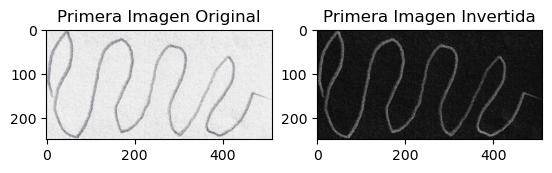

In [35]:
# Convertir imagen a negro, para utilizar el MaxPooling()
import cv2
import os
import matplotlib.pyplot as plt

# Directorio de las imágenes originales
directorio_original = "wave/testing/parkinson/"
directorio_destino = "test_parkinson_negro_wave"
os.makedirs(directorio_destino, exist_ok=True)

# Iterar sobre las imágenes originales
for filename in os.listdir(directorio_original):
    ruta_original = os.path.join(directorio_original, filename)
    imagen_original = cv2.imread(ruta_original)

    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)

    # Invertir colores en escala de grises
    imagen_invertida = cv2.bitwise_not(imagen_gris)

    # Nombre de la nueva imagen invertida
    nombre_nueva_imagen = f"{filename[:-4]}_invertida.png"
    ruta_nueva_imagen = os.path.join(directorio_destino, nombre_nueva_imagen)

    # Guardar la imagen invertida
    cv2.imwrite(ruta_nueva_imagen, imagen_invertida)

# Mostrar la primera imagen original e invertida
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(directorio_original, os.listdir(directorio_original)[0])), cv2.COLOR_BGR2RGB), cmap='gray')
plt.title("Primera Imagen Original")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(directorio_destino, os.listdir(directorio_destino)[0])), cv2.COLOR_BGR2RGB), cmap='gray')
plt.title("Primera Imagen Invertida")

plt.show()


In [20]:
import cv2
import os
import numpy as np
import imutils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorio de las imágenes originales
directorio_original = "negro_parkinson_wave"
directorio_destino = "3total_parkinson"
os.makedirs(directorio_destino, exist_ok=True)

# Configurar el generador de imágenes
datagen = ImageDataGenerator(
    rotation_range=0,  # No aplicar rotación aquí, se hará manualmente después
    horizontal_flip=True,
    vertical_flip=True
)

# Número de ángulos para rotar la imagen (10 vueltas)
num_vueltas = 10
num_rotaciones = 360 // num_vueltas  # Rotaciones por imagen

# Iterar sobre las imágenes originales
for filename in os.listdir(directorio_original):
    ruta_original = os.path.join(directorio_original, filename)
    imagen_original = cv2.imread(ruta_original)

    # Expandir las dimensiones para que tenga la forma (1, altura, ancho, canales)
    imagen_expandida = np.expand_dims(imagen_original, axis=0)

    # Generar imágenes aumentadas con el generador de imágenes
    imagenes_aumentadas = datagen.flow(imagen_expandida)

    # Iterar sobre las imágenes generadas y aplicar rotaciones personalizadas
    for i in range(num_rotaciones):
        # Obtener la imagen aumentada y quitar la dimensión extra
        imagen_aumentada = np.squeeze(next(imagenes_aumentadas), axis=0)

        # Ángulo de rotación en grados
        angulo = i * (360 / num_rotaciones)

        # Rotar la imagen usando imutils.rotate_bound
        imagen_rotada = imutils.rotate_bound(imagen_aumentada, angulo)

        # Nombre de la nueva imagen aumentada
        nombre_nueva_imagen = f"{filename[:-4]}_rotada_{i}.png"
        ruta_nueva_imagen = os.path.join(directorio_destino, nombre_nueva_imagen)

        # Guardar la imagen aumentada
        cv2.imwrite(ruta_nueva_imagen, imagen_rotada)

print("Aumentación de datos completada.")


Aumentación de datos completada.


In [39]:
# Imagenes Training
import cv2
import os
import numpy as np

# Directorio de las imágenes originales
directorio_original = "test_healthy_negro_wave"
directorio_destino = "10tes_total_healthy"
os.makedirs(directorio_destino, exist_ok=True)

# Número de ángulos para rotar la imagen (10 vueltas)
num_rotaciones_por_imagen = 10

# Iterar sobre las imágenes originales
for filename in os.listdir(directorio_original):
    ruta_original = os.path.join(directorio_original, filename)
    imagen_original = cv2.imread(ruta_original)

    # Iterar sobre las imágenes generadas y aplicar rotaciones personalizadas
    for i in range(num_rotaciones_por_imagen):
        # Ángulo de rotación en grados
        angulo = i * (360 / num_rotaciones_por_imagen)

        # Rotar la imagen usando OpenCV
        matriz_rotacion = cv2.getRotationMatrix2D((imagen_original.shape[1] // 2, imagen_original.shape[0] // 2), angulo, 1)
        imagen_rotada = cv2.warpAffine(imagen_original, matriz_rotacion, (imagen_original.shape[1], imagen_original.shape[0]))

        # Nombre de la nueva imagen aumentada
        nombre_nueva_imagen = f"{filename[:-4]}_rotada_{i}.png"
        ruta_nueva_imagen = os.path.join(directorio_destino, nombre_nueva_imagen)

        # Guardar la imagen aumentada
        cv2.imwrite(ruta_nueva_imagen, imagen_rotada)

print("Aumentación de datos completada.")


Aumentación de datos completada.


In [30]:
# Mirar este -> https://colab.research.google.com/drive/1DQc8a-WOTctenvoy5T0lWUXn47EuteCy?usp=sharing#scrollTo=BtEYnFkNyN_s
import pandas as pd
from PIL import Image
import pandas as pd
import os

carpeta = '10total_parkinson'

# Lista para almacenar las rutas de los archivos
rutas_archivos = []

# Obtener la lista de archivos en la carpeta
for root, dirs, files in os.walk(carpeta):
    for file in files:
        # Añadir la ruta completa del archivo a la lista
        ruta_completa = os.path.join(root, file)
        rutas_archivos.append(ruta_completa)

# Crear un DataFrame de ejemplo con rutas de imágenes
data = {'imagen': rutas_archivos}
df = pd.DataFrame(data)

# Función para obtener la carpeta de una ruta
def obtener_carpeta(ruta):
    return os.path.dirname(ruta)

# Función para obtener el nombre de la imagen sin la extensión
def obtener_nombre_imagen(ruta):
    return os.path.splitext(os.path.basename(ruta))[0]

# Agregar una columna 'carpeta' al DataFrame
df['carpeta'] = df['imagen'].apply(obtener_carpeta)

df['carpeta'] = df['carpeta'].map({'spiral/training\healthy': 0, 'spiral/training\parkinson': 1})
# Mostrar el DataFrame resultante
print(df)

                                               imagen  carpeta
0    10total_parkinson\V01PO02_invertida_rotada_0.png      NaN
1    10total_parkinson\V01PO02_invertida_rotada_1.png      NaN
2    10total_parkinson\V01PO02_invertida_rotada_2.png      NaN
3    10total_parkinson\V01PO02_invertida_rotada_3.png      NaN
4    10total_parkinson\V01PO02_invertida_rotada_4.png      NaN
..                                                ...      ...
355  10total_parkinson\V15PO03_invertida_rotada_5.png      NaN
356  10total_parkinson\V15PO03_invertida_rotada_6.png      NaN
357  10total_parkinson\V15PO03_invertida_rotada_7.png      NaN
358  10total_parkinson\V15PO03_invertida_rotada_8.png      NaN
359  10total_parkinson\V15PO03_invertida_rotada_9.png      NaN

[360 rows x 2 columns]


In [31]:
df.shape

(360, 2)